# 데이터마이닝 프로젝트

## 과제 2 :  Data preparation & EDA

### (1) 라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
import seaborn as sns

### (2) 데이터 불러오기

In [2]:
weather_path = 'weather.csv'
# read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
weather = pd.read_csv(weather_path, encoding = 'CP949')

In [3]:
weather.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,112,인천,2010-10-01,17.2,NaN,1.7,NaN,NaN
1,112,인천,2010-10-02,16.9,17.5,2.1,NaN,NaN
2,112,인천,2010-10-03,17.8,7.5,3.4,NaN,NaN
3,112,인천,2010-10-04,14.9,3.0,3.9,NaN,NaN
4,112,인천,2010-10-05,15.6,NaN,2.0,NaN,NaN


In [4]:
## 불필요한 columns 삭제
drop_weather = ['지점', '지점명']
weather = weather.drop(drop_weather, axis=1)

In [5]:
weather.head()

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-01,17.2,NaN,1.7,NaN,NaN
1,2010-10-02,16.9,17.5,2.1,NaN,NaN
2,2010-10-03,17.8,7.5,3.4,NaN,NaN
3,2010-10-04,14.9,3.0,3.9,NaN,NaN
4,2010-10-05,15.6,NaN,2.0,NaN,NaN


In [6]:
reservation_path = 'reservation.csv'
reservation = pd.read_csv(reservation_path, encoding = 'CP949')

In [7]:
reservation.head()

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
0,인천대공원,대공원풋살장,2010-10-26,NaN,Y,1.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,NaN,Y,1.0,2010-10-27,2010-10-27
2,인천대공원,대공원축구장,2010-11-01,운봉공고,Y,1.0,2010-11-05,2010-11-05
3,인천대공원,대공원축구장,2010-11-01,(주)태평양제약,Y,1.0,2010-11-02,2010-11-02
4,인천대공원,중앙공원축구장,2010-11-01,축구사랑,Y,1.0,2010-11-04,2010-11-04


In [8]:
weather.info()
reservation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           3378 non-null   object 
 1   평균기온(°C)     3378 non-null   float64
 2   일강수량(mm)     1181 non-null   float64
 3   평균 풍속(m/s)   3376 non-null   float64
 4   일 최심신적설(cm)  109 non-null    float64
 5   일 최심적설(cm)   207 non-null    float64
dtypes: float64(5), object(1)
memory usage: 158.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127252 entries, 0 to 127251
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사업부서    127252 non-null  object 
 1   대관시설    127252 non-null  object 
 2   예약접수일   127252 non-null  object 
 3   단체명     69689 non-null   object 
 4   단체구분    127252 non-null  object 
 5   인원      127251 non-null  float64
 6   이용시작일   127252 non-null  object 
 7   이용종료일   127252 non-null  object 
dtypes: float6

In [9]:
print(weather.shape)
print(weather.count())

# weather의 총 관측수는 3378개, 열(변수)의 수는 6개

(3378, 6)
일시             3378
평균기온(°C)       3378
일강수량(mm)       1181
평균 풍속(m/s)     3376
일 최심신적설(cm)     109
일 최심적설(cm)      207
dtype: int64


In [10]:
print(reservation.shape)
print(reservation.count())

# reservation의 총 관측수는 127252개, 열(변수)의 수는 8개

(127252, 8)
사업부서     127252
대관시설     127252
예약접수일    127252
단체명       69689
단체구분     127252
인원       127251
이용시작일    127252
이용종료일    127252
dtype: int64


### (3) 결측치 확인 및 처리

In [11]:
# 결측치 확인
print('weather : ', weather.isnull().sum())
print('----------------------------')
print('reservation : ', reservation.isnull().sum())

weather :  일시                0
평균기온(°C)          0
일강수량(mm)       2197
평균 풍속(m/s)        2
일 최심신적설(cm)    3269
일 최심적설(cm)     3171
dtype: int64
----------------------------
reservation :  사업부서         0
대관시설         0
예약접수일        0
단체명      57563
단체구분         0
인원           1
이용시작일        0
이용종료일        0
dtype: int64


**weather**

weather의 결측치는 비가 내리지 않아서, 눈이 내리지 않아서 등의 이유로 인한 것임.

따라서 해당 결측치에는 0을 넣어줌.

**reservation**

reservation의 결측치인 단체명과 인원은 해당 데이터 분석에서는 중요한 변수가 아니므로 0을 채워줌.

In [12]:
## weather data 결측치에 0 넣기
weather = weather.fillna(0).iloc[0:3378, 0:6]

In [13]:
weather.head()

,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-01,17.2,0.0,1.7,0.0,0.0
1,2010-10-02,16.9,17.5,2.1,0.0,0.0
2,2010-10-03,17.8,7.5,3.4,0.0,0.0
3,2010-10-04,14.9,3.0,3.9,0.0,0.0
4,2010-10-05,15.6,0.0,2.0,0.0,0.0


In [14]:
## reservation data 결측치에 0 넣기
reservation = reservation.fillna(0).iloc[0:127252, 0:8]

In [15]:
reservation.head()

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
0,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
2,인천대공원,대공원축구장,2010-11-01,운봉공고,Y,1.0,2010-11-05,2010-11-05
3,인천대공원,대공원축구장,2010-11-01,(주)태평양제약,Y,1.0,2010-11-02,2010-11-02
4,인천대공원,중앙공원축구장,2010-11-01,축구사랑,Y,1.0,2010-11-04,2010-11-04


In [16]:
# 결측치 처리됐는지 확인
print('weather : ', weather.isnull().sum())
print('----------------------------')
print('reservation : ', reservation.isnull().sum())

weather :  일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64
----------------------------
reservation :  사업부서     0
대관시설     0
예약접수일    0
단체명      0
단체구분     0
인원       0
이용시작일    0
이용종료일    0
dtype: int64


결측치가 사라진 것을 확인할 수 있음.

In [44]:
## 이용시작일의 날짜를 기준으로 내림차순 정렬
reservation = reservation.sort_values(by = ['이용시작일'])
reservation

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일
91833,인천대공원,대공원축구장,2018-03-26,feclub,Y,22.0,10,10
0,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
68,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27
35,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27
...,...,...,...,...,...,...,...,...
126178,인천시설공단(청소년수련관),공연장,2019-10-30,0,N,1.0,2019-12-31,2019-12-31
126177,인천시설공단(청소년수련관),공연장,2019-10-30,0,N,1.0,2019-12-31,2019-12-31
126506,송도공원사업단,달빛축제공원(배드민턴장),2019-11-01,0,Y,10.0,2019-12-31,2019-12-31
111004,인천삼산월드체육관,인조잔디구장,2019-03-01,블루스카이f.c,Y,30.0,2090-05-05,2090-05-05


In [19]:
weather.corr()

,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
평균기온(°C),1.000000,0.158253,-0.335107,-0.168492,-0.278881
일강수량(mm),0.158253,1.000000,0.087856,0.009718,-0.016982
평균 풍속(m/s),-0.335107,0.087856,1.000000,0.060116,0.078315
일 최심신적설(cm),-0.168492,0.009718,0.060116,1.000000,0.563301
일 최심적설(cm),-0.278881,-0.016982,0.078315,0.563301,1.000000


### (4) Data merge

In [20]:
merged = pd.merge(reservation, weather, 
                  how='left', left_on = '이용시작일', right_on = '일시')
merged.head() ## 결측값 발생

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,인천대공원,대공원축구장,2018-03-26,feclub,Y,22.0,10,10,NaN,NaN,NaN,NaN,NaN,NaN
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
2,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
3,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
4,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0


In [21]:
# 결측치 다시 확인
print('merged : ', merged.isnull().sum())

# 노이즈로 인한 것으로 예상됨 -> 해당 row 삭제

merged :  사업부서            0
대관시설            0
예약접수일           0
단체명             0
단체구분            0
인원              0
이용시작일           0
이용종료일           0
일시             32
평균기온(°C)       32
일강수량(mm)       32
평균 풍속(m/s)     32
일 최심신적설(cm)    32
일 최심적설(cm)     32
dtype: int64


In [22]:
## 결측값이 발생한 row 삭제
merged.dropna(inplace=True)
merged.head()

,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용시작일,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
1,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
2,인천대공원,대공원풋살장,2010-10-26,세계일등축구단,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
3,인천대공원,대공원풋살장,2010-10-26,0,Y,123.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
4,인천대공원,대공원풋살장,2010-10-26,0,Y,1.0,2010-10-27,2010-10-27,2010-10-27,6.2,0.0,2.1,0.0,0.0
5,인천대공원,대공원풋살장,2010-10-27,세계일등축구단,Y,10.0,2010-10-28,2010-10-28,2010-10-28,7.9,0.0,2.8,0.0,0.0


In [23]:
# 결측치 다시 확인
print('merged : ', merged.isnull().sum())

merged :  사업부서           0
대관시설           0
예약접수일          0
단체명            0
단체구분           0
인원             0
이용시작일          0
이용종료일          0
일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127220 entries, 1 to 127249
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   사업부서         127220 non-null  object 
 1   대관시설         127220 non-null  object 
 2   예약접수일        127220 non-null  object 
 3   단체명          127220 non-null  object 
 4   단체구분         127220 non-null  object 
 5   인원           127220 non-null  float64
 6   이용시작일        127220 non-null  object 
 7   이용종료일        127220 non-null  object 
 8   일시           127220 non-null  object 
 9   평균기온(°C)     127220 non-null  float64
 10  일강수량(mm)     127220 non-null  float64
 11  평균 풍속(m/s)   127220 non-null  float64
 12  일 최심신적설(cm)  127220 non-null  float64
 13  일 최심적설(cm)   127220 non-null  float64
dtypes: float64(6), object(8)
memory usage: 14.6+ MB


위에서 merge 한 merged data를 살펴보면, 분석하기에 적합하지 않다.

이용시작일과 평균기온의 산점도를 살펴보고자 했지만

object type과 float type으로, data type의 차이로 인한 오류가 발생한다.

따라서 새로운 데이터프레임을 선언한다.

groupby로 해당 날짜에 예약한 단체 수를 count 하여 columns으로 추가한다.

즉 새로운 데이터프레임에는 일시, 예약단체수, weather merge 한 columns가 있을 예정이다.

### (5) 새로운 데이터프레임 선언

In [25]:
new = merged.groupby("이용시작일").count().reset_index()
new.head()

,이용시작일,사업부서,대관시설,예약접수일,단체명,단체구분,인원,이용종료일,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-27,4,4,4,4,4,4,4,4,4,4,4,4,4
1,2010-10-28,2,2,2,2,2,2,2,2,2,2,2,2,2
2,2010-10-29,3,3,3,3,3,3,3,3,3,3,3,3,3
3,2010-10-30,2,2,2,2,2,2,2,2,2,2,2,2,2
4,2010-11-01,1,1,1,1,1,1,1,1,1,1,1,1,1


In [26]:
## 필요없는 columns 삭제
cols = ["사업부서", "대관시설", "예약접수일", "단체명", "이용종료일", "일시", 
        "평균기온(°C)", "일강수량(mm)", "평균 풍속(m/s)", "일 최심신적설(cm)",
       "일 최심적설(cm)", "단체구분"]
new.drop(labels = cols, axis = "columns", inplace = True)

In [27]:
new.head()

,이용시작일,인원
0,2010-10-27,4
1,2010-10-28,2
2,2010-10-29,3
3,2010-10-30,2
4,2010-11-01,1


In [28]:
## new와 weather merge
new_merged = pd.merge(new, weather, 
                  how='left', left_on = '이용시작일', right_on = '일시')

In [29]:
## 필요없는 columns 삭제
new_merged.drop(labels = "일시", axis = "columns", inplace = True)
new_merged.head()

,이용시작일,인원,평균기온(°C),일강수량(mm),평균 풍속(m/s),일 최심신적설(cm),일 최심적설(cm)
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0


In [30]:
## columns의 이름 재선언
new_merged.rename(columns = {new_merged.columns[0]:"date",
                    new_merged.columns[1]:"reserved_num",
                    new_merged.columns[2]:"avg_temp",
                    new_merged.columns[3]:"daily_prec",
                    new_merged.columns[4]:"avg_wind",
                    new_merged.columns[5]:"latest_snow",
                    new_merged.columns[6]:"most_snow"}, inplace=True)
new_merged.head()

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow
0,2010-10-27,4,6.2,0.0,2.1,0.0,0.0
1,2010-10-28,2,7.9,0.0,2.8,0.0,0.0
2,2010-10-29,3,10.4,0.0,2.7,0.0,0.0
3,2010-10-30,2,12.0,0.0,2.2,0.0,0.0
4,2010-11-01,1,11.9,0.0,4.3,0.0,0.0


* date : 이용일

* reserved_num : 예약단체 수 (Number of reserved organization

* avg_temp : 평균기온
 
* daily_precipitation : 일강수량

* avg_wind : 평균풍속

* latest_snow : 최신심적설 (새로 와서 쌓인 눈의 두께)

* most_snow : 최심적설 (최대로 깊었던 적설량. 며칠씩 쌓인 최대량)

### (6) 결측치 확인

In [31]:
## 결측치 확인
print('merged : ', merged.isnull().sum())

merged :  사업부서           0
대관시설           0
예약접수일          0
단체명            0
단체구분           0
인원             0
이용시작일          0
이용종료일          0
일시             0
평균기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
일 최심신적설(cm)    0
일 최심적설(cm)     0
dtype: int64


In [32]:
new_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3345 entries, 0 to 3344
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3345 non-null   object 
 1   reserved_num  3345 non-null   int64  
 2   avg_temp      3345 non-null   float64
 3   daily_prec    3345 non-null   float64
 4   avg_wind      3345 non-null   float64
 5   latest_snow   3345 non-null   float64
 6   most_snow     3345 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 209.1+ KB


### (7) 상관관계 분석 및 시각화

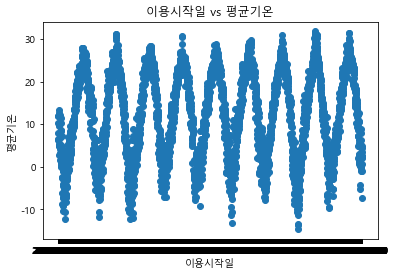

In [33]:
plt.scatter(new_merged.date, new_merged.avg_temp)
plt.title("이용시작일 vs 평균기온")
plt.xlabel("이용시작일")
plt.ylabel("평균기온")
plt.show()

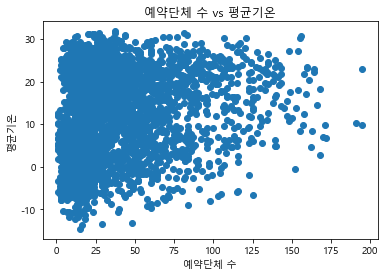

In [34]:
plt.scatter(new_merged.reserved_num, new_merged.avg_temp)
plt.title("예약단체 수 vs 평균기온")
plt.xlabel("예약단체 수")
plt.ylabel("평균기온")
plt.show()

예약단체 수와 평균기온에는 상관관계가 없는 것으로 확인됨.

C:\Users\adore\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\adore\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\adore\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\adore\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


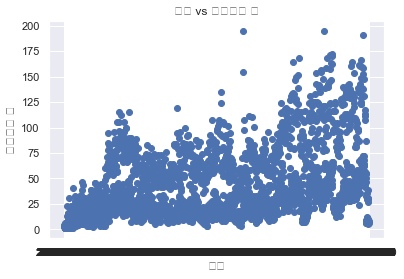

In [43]:
plt.scatter(new_merged.date, new_merged.reserved_num)
plt.title("날짜 vs 예약단체 수")
plt.xlabel("날짜")
plt.ylabel("예약단체 수")
plt.show()

In [35]:
cols = ["reserved_num", "avg_temp", "daily_prec", 
        "avg_wind", "latest_snow", "most_snow"]
corr = new_merged[cols].corr(method = 'pearson')
print(corr)

              reserved_num  avg_temp  daily_prec  avg_wind  latest_snow  \
reserved_num      1.000000  0.185654    0.007434 -0.073847    -0.046900   
avg_temp          0.185654  1.000000    0.158875 -0.334738    -0.167776   
daily_prec        0.007434  0.158875    1.000000  0.088568     0.009530   
avg_wind         -0.073847 -0.334738    0.088568  1.000000     0.060172   
latest_snow      -0.046900 -0.167776    0.009530  0.060172     1.000000   
most_snow        -0.083731 -0.278631   -0.017277  0.078622     0.563114   

              most_snow  
reserved_num  -0.083731  
avg_temp      -0.278631  
daily_prec    -0.017277  
avg_wind       0.078622  
latest_snow    0.563114  
most_snow      1.000000  


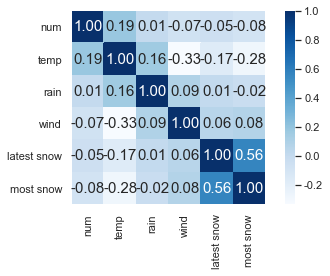

In [36]:
cols_view = ['num', 'temp', 'rain', 'wind', 'latest snow', 'most snow']
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 15},
                yticklabels = cols_view,
                xticklabels = cols_view,
                cmap='Blues')
plt.tight_layout()
plt.show()

히트맵의 결과를 통해 변수들간의 상관관계가 없는 것으로 확인됨.

따라서 차원축소 등을 시행할 필요는 없을 것이라 예상됨.

### (8) 이상치 확인

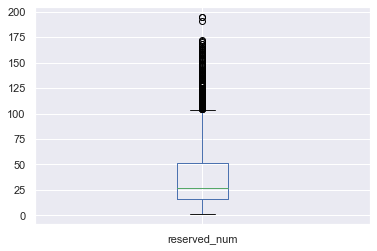

In [37]:
new_merged.plot(kind='box', y='reserved_num')

위 boxplot을 보면 이상치가 있는 것으로 확인됨.

In [38]:
new_merged['reserved_num'].describe()

count    3345.000000
mean       38.032885
std        31.809373
min         1.000000
25%        16.000000
50%        27.000000
75%        51.000000
max       195.000000
Name: reserved_num, dtype: float64

In [39]:
q1 = new_merged['reserved_num'].quantile(0.25)
q3 = new_merged['reserved_num'].quantile(0.75)

iqr = q3 - q1

re=(new_merged['reserved_num']<q1-iqr*1.5) | (new_merged['reserved_num']>q3+iqr*1.5)
new_merged[re]

,date,reserved_num,avg_temp,daily_prec,avg_wind,latest_snow,most_snow
576,2012-06-02,105,21.0,0.0,2.0,0.0,0.0
598,2012-06-24,115,27.0,0.0,2.2,0.0,0.0
605,2012-07-01,105,20.9,0.1,2.1,0.0,0.0
618,2012-07-14,112,23.4,5.6,2.1,0.0,0.0
660,2012-08-25,105,25.3,10.4,2.9,0.0,0.0
...,...,...,...,...,...,...,...
3293,2019-11-10,148,10.8,21.4,3.2,0.0,0.0
3299,2019-11-16,113,7.3,0.0,1.8,0.0,0.0
3300,2019-11-17,107,9.7,23.7,3.8,0.0,0.0
3306,2019-11-23,117,12.7,0.0,1.8,0.0,0.0


총 189개의 이상치가 있다는 것을 확인할 수 있음.

그런데 이상치인지 확실하지 않음.

단순히 해당 일에 예약자수가 많았을 수 있음.

따라서 이 이상치는 모델링을 하며 다룰 예정임.

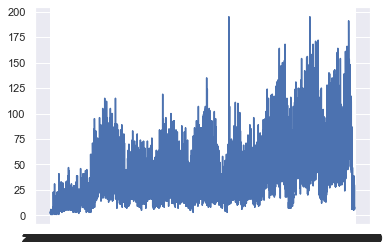

In [40]:
plt.plot(new_merged.date, new_merged.reserved_num, color = 'b')
plt.show()

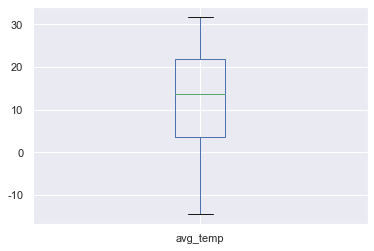

In [41]:
new_merged.plot(kind='box', y='avg_temp')

평균기온의 경우 이상치가 없음.